WBCD Dataset Neural Network 

### Import Libraries

In [2]:
import mlrose

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

### Import more Libraries


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from textwrap import wrap

### Load Dataset

In [4]:
RANDOM_SEED = 25


columns = ['Radius','Texture','Perimeter','Area','Smoothness','Compactness',
           'Concavity','Concave_Points','Symmetry','Fractal_Dimension',
           'Malignant/Benign']

# Read CSV file into pandas df
df = pd.read_csv('../datasets/breast_cancer/breast-cancer-wisconsin.csv',
                 delimiter=',', quotechar='"', names=columns)

### Dataframe without Preprocessing 

In [5]:
print("Printing dataframe head (without any preprocessing)....")
print(df.head(10))

Printing dataframe head (without any preprocessing)....
    Radius  Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
0  1000025        5          1     1           1            2         1   
1  1002945        5          4     4           5            7        10   
2  1015425        3          1     1           1            2         2   
3  1016277        6          8     8           1            3         4   
4  1017023        4          1     1           3            2         1   
5  1017122        8         10    10           8            7        10   
6  1018099        1          1     1           1            2        10   
7  1018561        2          1     2           1            2         1   
8  1033078        2          1     1           1            2         1   
9  1033078        4          2     1           1            2         1   

   Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
0               3         1                  1     

### Dataset Preprocessing 

In [6]:
# Shuffle
df = shuffle(df, random_state=RANDOM_SEED)

# DROP USELESS ROWS AND COLUMNS
df.dropna(inplace=True)
cols = [0]
# Drop ID column (it's not attribute or target)
df.drop(df.columns[cols],axis=1,inplace=True)
# Drop all data points with missing variables  (denoted by '?' entry)
nostrings_row_list = [x.isdigit() for x in df.iloc[:,5]]
df = df[nostrings_row_list]


# Handle categorical data
# df = pd.get_dummies(df)


# Split data into X and y vectors
X = df.ix[:, df.columns != 'Malignant/Benign']
y = df['Malignant/Benign']

# Change 2 -> 0 (benign) and 4 -> 1 (malignant)
y.replace(2, 0, inplace=True)
y.replace(4, 1, inplace=True)

/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### Sanity Check on Dataframe 

In [7]:
print("Sanity Check: Printing out dataframe and shape after preprocessing... ")
print(df.head(10))
print("df.shape: ", df.shape)


Sanity Check: Printing out dataframe and shape after preprocessing... 
     Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
437        4          1     1           1            2         1   
511        5          1     1           1            2         1   
215        8          7     8           7            5         5   
684        1          1     1           1            2         1   
302       10         10    10           7            9        10   
341        1          1     1           1            2         1   
608        5         10    10          10           10        10   
366        6         10    10          10            8        10   
205        5         10    10           9            6        10   
270        8          4     7           1            3        10   

     Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
437               1         1                  1                 0  
511               2         1             

### Training and Testing Split, Scaling 

In [8]:
# Split into 30%  training data, 70% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=RANDOM_SEED)


# Apply scaling. Large values of certain features undesireable for NN
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/saksham/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


### Sanity Check on X_train

In [9]:
print("Sanity Check: Printing out X_train... ")
print(X_train[:4])
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)


Sanity Check: Printing out X_train... 
[[ 0.21607913  0.26729122  0.89900862  1.44426357  2.63187492  0.94645923
   1.85978038  2.25742091 -0.34434076]
 [-0.1425522   1.54175711  1.22554822  2.47980054  0.356122    1.76653327
   1.45180653  0.66496637 -0.34434076]
 [ 2.00923577 -0.36994172 -0.4071498  -0.62681039 -0.55417916  0.67310122
  -0.99603658 -0.60899726  0.20067541]
 [-1.21844619 -0.68855819 -0.7336894  -0.62681039 -1.00932974 -0.69368885
  -0.99603658 -0.60899726 -0.34434076]]
X_train.shape:  (478, 9)
X_test.shape:  (205, 9)
y_train.shape:  (478,)
y_test.shape:  (205,)


### Simulated Annealing Code (Test different starting temperatures) 

In [51]:
np.random.seed(23)

hidden_node_architecture = [15, 15, 15]

# Lists to hold values for x and y axes 
max_iter = 3000 
testError = []
trainError = []

# exp_decay_constant = np.arange(0.005, 0.1, 0.005)
starting_temp = np.arange(1, 2.75, 0.25)

# COMMENCE TRAINING LOOP 
for temp in starting_temp: 
        
    # Make decay object for Simulated Annealing to work
    decayObject = mlrose.ExpDecay(init_temp=temp, exp_const=exp_constant, min_temp=0.001)
    
    print("Training NN with starting_temp: ", temp)
    
    nn_sigmoid = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'simulated_annealing', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True, 
                                        schedule=decayObject, 
                                        clip_max = 5, max_attempts = 100)

    nn_sigmoid.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred = nn_sigmoid.predict(X_train)
    y_test_pred = nn_sigmoid.predict(X_test)
    
    # MSE Values 
    train_err = mean_squared_error(y_train,
                        y_train_pred)
    test_err = mean_squared_error(y_test,
                        y_test_pred) 

    # Accuracy Values
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    data.append([max_iter, y_train_accuracy, y_test_accuracy, train_err, test_err])
    
    
    # Append data to lists
    testError.append(test_err)
    trainError.append(train_err)
    max_iter_list.append(max_iter)
    
    


Training NN with starting_temp:  0.75
Training NN with starting_temp:  0.875
Training NN with starting_temp:  1.0
Training NN with starting_temp:  1.125
Training NN with starting_temp:  1.25
Training NN with starting_temp:  1.375
Training NN with starting_temp:  1.5
Training NN with starting_temp:  1.625
Training NN with starting_temp:  1.75
Training NN with starting_temp:  1.875
Training NN with starting_temp:  2.0
Training NN with starting_temp:  2.125
Training NN with starting_temp:  2.25
Training NN with starting_temp:  2.375
Training NN with starting_temp:  2.5
Training NN with starting_temp:  2.625


### Plot it out (Simulated Annealing - Change exp constant) 

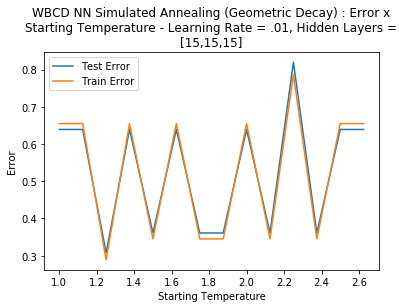

In [53]:
plt.figure()
title = "WBCD NN Simulated Annealing (Geometric Decay) : Error x Starting Temperature - Learning Rate = .01, Hidden Layers = [15,15,15]"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(starting_temp, testError, '-', label='Test Error')
plt.plot(starting_temp, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Starting Temperature')
plt.ylabel('Error')
filename = 'WBCD_SA(GeomDecay)_Hyperparameters_StartingTemp.png'
plt.savefig("../plots/" + filename)

### Simulated Annealing Code (TEST 3 Decays)


In [27]:
np.random.seed(5)

hidden_node_architecture = [15, 15, 15]

# Lists to hold values for x and y axes 
max_iter_list = list()
arith_testError = []
arith_trainError = []
geom_testError = []
geom_trainError = []
exp_testError = []
exp_trainError = []


# Create list to hold data on each trial
data = []
# Columns for df we'll create after loop 
cols = ["Max Iterations", "training accuracy", "testing accuracy", "training MSE", "testing MSE"]

# Make decay objects for Simulated Annealing to work 
arith_decayObject = mlrose.ArithDecay()
geom_decayObject = mlrose.GeomDecay()
exp_decayObject = mlrose.ExpDecay()

max_iter_list = [i for i in range(500, 10001, 500)]

# COMMENCE TRAINING LOOP 

for max_iter in max_iter_list:
    
    print("Training NN with max_iter: ", max_iter)
    
    nn_sigmoid_arith = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'simulated_annealing', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True, 
                                        schedule=arith_decayObject, 
                                        clip_max = 5, max_attempts = 100)

    nn_sigmoid_arith.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred_arith = nn_sigmoid_arith.predict(X_train)
    y_test_pred_arith = nn_sigmoid_arith.predict(X_test)
    
    # MSE Values 
    arith_train_err = mean_squared_error(y_train,
                        y_train_pred_arith)
    arith_test_err = mean_squared_error(y_test,
                        y_test_pred_arith) 

    
    nn_sigmoid_geom = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'simulated_annealing', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True, 
                                        schedule=geom_decayObject, 
                                        clip_max = 5, max_attempts = 100)
    
    
    nn_sigmoid_geom.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred_geom = nn_sigmoid_geom.predict(X_train)
    y_test_pred_geom = nn_sigmoid_geom.predict(X_test)
    
    # MSE Values 
    geom_train_err = mean_squared_error(y_train,
                        y_train_pred_geom)
    geom_test_err = mean_squared_error(y_test,
                        y_test_pred_geom) 
    
    
    
    nn_sigmoid_exp = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'simulated_annealing', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True, 
                                        schedule=exp_decayObject, 
                                        clip_max = 5, max_attempts = 100)
    
    
    nn_sigmoid_exp.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred_exp = nn_sigmoid_exp.predict(X_train)
    y_test_pred_exp = nn_sigmoid_exp.predict(X_test)
    
    # MSE Values 
    exp_train_err = mean_squared_error(y_train,
                        y_train_pred_exp)
    exp_test_err = mean_squared_error(y_test,
                        y_test_pred_exp) 
    
    
    
    # Append data to lists
    arith_testError.append(arith_test_err)
    arith_trainError.append(arith_train_err)
    geom_testError.append(geom_test_err)
    geom_trainError.append(geom_train_err)
    exp_testError.append(exp_test_err)
    exp_trainError.append(exp_train_err)

    
print("DONE")


Training NN with max_iter:  500
Training NN with max_iter:  1000
Training NN with max_iter:  1500
Training NN with max_iter:  2000
Training NN with max_iter:  2500
Training NN with max_iter:  3000
Training NN with max_iter:  3500
Training NN with max_iter:  4000
Training NN with max_iter:  4500
Training NN with max_iter:  5000
Training NN with max_iter:  5500
Training NN with max_iter:  6000
Training NN with max_iter:  6500
Training NN with max_iter:  7000
Training NN with max_iter:  7500
Training NN with max_iter:  8000
Training NN with max_iter:  8500
Training NN with max_iter:  9000
Training NN with max_iter:  9500
Training NN with max_iter:  10000
DONE


### Plot it out (Simulated Annealing - all 3) 

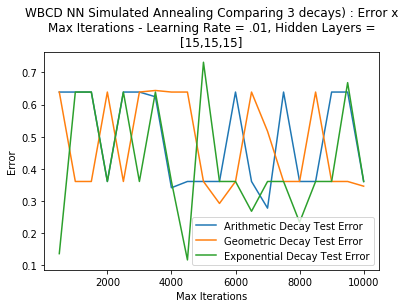

In [29]:
plt.figure()
title = "WBCD NN Simulated Annealing Comparing 3 decays) : Error x Max Iterations - Learning Rate = .01, Hidden Layers = [15,15,15]"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)

plt.plot(max_iter_list, arith_testError, '-', label='Arithmetic Decay Test Error')
# plt.plot(max_iter_list, arith_testError, '-', label='Arithmetic Decay Train Error')
plt.plot(max_iter_list, geom_testError, '-', label='Geometric Decay Test Error')
# plt.plot(max_iter_list, geom_testError, '-', label='Geometric Decay Train Error')
plt.plot(max_iter_list, exp_testError, '-', label='Exponential Decay Test Error')
# plt.plot(max_iter_list, exp_testError, '-', label='Exponential Decay Train Error')

plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Error')
filename = 'WBCD_SA(All3Decays)_MaxIter.png'
plt.savefig("../plots/" + filename)

### RHC Code

In [24]:
# np.random.seed(5)
np.random.seed(27)

hidden_node_architecture = [15, 15, 15]

# Lists to hold values for x and y axes 
max_iter_list = list()
testError = []
trainError = []

# Create list to hold data on each trial
data = []
# Columns for df we'll create after loop 
cols = ["Max Iterations", "training accuracy", "testing accuracy", "training MSE", "testing MSE"]

# COMMENCE TRAINING LOOP 
# for max_iter in range(500, 10001, 500) :
for max_iter in range(100, 2000, 50) :
    
    print("Training NN with max_iter: ", max_iter)
    
    nn_sigmoid = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'random_hill_climb', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True, 
                                        pop_size=100, restarts=5, 
                                        clip_max = 5, max_attempts = 100)

    nn_sigmoid.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred = nn_sigmoid.predict(X_train)
    y_test_pred = nn_sigmoid.predict(X_test)
    
    # MSE Values 
    train_err = mean_squared_error(y_train,
                        y_train_pred)
    test_err = mean_squared_error(y_test,
                        y_test_pred) 

    # Accuracy Values
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    data.append([max_iter, y_train_accuracy, y_test_accuracy, train_err, test_err])
    
    
    # Append data to lists
    testError.append(test_err)
    trainError.append(train_err)
    max_iter_list.append(max_iter)
    
    
# Store results from above into df 
result_df = pd.DataFrame(data, columns=cols)
print(result_df)
    


Training NN with max_iter:  100
Training NN with max_iter:  150
Training NN with max_iter:  200
Training NN with max_iter:  250
Training NN with max_iter:  300
Training NN with max_iter:  350
Training NN with max_iter:  400
Training NN with max_iter:  450
Training NN with max_iter:  500
Training NN with max_iter:  550
Training NN with max_iter:  600
Training NN with max_iter:  650
Training NN with max_iter:  700
Training NN with max_iter:  750
Training NN with max_iter:  800
Training NN with max_iter:  850
Training NN with max_iter:  900
Training NN with max_iter:  950
Training NN with max_iter:  1000
Training NN with max_iter:  1050
Training NN with max_iter:  1100
Training NN with max_iter:  1150
Training NN with max_iter:  1200
Training NN with max_iter:  1250
Training NN with max_iter:  1300
Training NN with max_iter:  1350
Training NN with max_iter:  1400
Training NN with max_iter:  1450
Training NN with max_iter:  1500
Training NN with max_iter:  1550
Training NN with max_iter:  

### Plot it out (RHC)

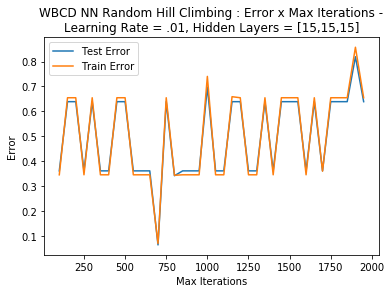

In [25]:


plt.figure()
title = "WBCD NN Random Hill Climbing : Error x Max Iterations - Learning Rate = .01, Hidden Layers = [15,15,15]"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iter_list, testError, '-', label='Test Error')
plt.plot(max_iter_list, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Error')
filename = 'WBCD_RHC_MaxIter_SMALLVar_Seed27.png'
plt.savefig("../plots/" + filename)


### SGD Code 

In [17]:
# np.random.seed(5)
np.random.seed(23)

hidden_node_architecture = [15, 15, 15]

# Lists to hold values for x and y axes 
max_iter_list = list()
testError = []
trainError = []

# Create list to hold data on each trial
data = []
# Columns for df we'll create after loop 
cols = ["Max Iterations", "training accuracy", "testing accuracy", "training MSE", "testing MSE"]

# COMMENCE TRAINING LOOP 
# for max_iter in range(500, 10001, 500) :
for max_iter in range(100, 1000, 50) :
    
    print("Training NN with max_iter: ", max_iter)
    
    nn_sigmoid = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'gradient_descent', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True, 
                                        pop_size=100,
                                        clip_max = 5, max_attempts = 100)

    nn_sigmoid.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred = nn_sigmoid.predict(X_train)
    y_test_pred = nn_sigmoid.predict(X_test)
    
    # MSE Values 
    train_err = mean_squared_error(y_train,
                        y_train_pred)
    test_err = mean_squared_error(y_test,
                        y_test_pred) 

    # Accuracy Values
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    data.append([max_iter, y_train_accuracy, y_test_accuracy, train_err, test_err])
    
    
    # Append data to lists
    testError.append(test_err)
    trainError.append(train_err)
    max_iter_list.append(max_iter)
    
    
# Store results from above into df 
result_df = pd.DataFrame(data, columns=cols)
print(result_df)
    


Training NN with max_iter:  100
Training NN with max_iter:  150
Training NN with max_iter:  200
Training NN with max_iter:  250
Training NN with max_iter:  300
Training NN with max_iter:  350
Training NN with max_iter:  400
Training NN with max_iter:  450
Training NN with max_iter:  500
Training NN with max_iter:  550
Training NN with max_iter:  600
Training NN with max_iter:  650
Training NN with max_iter:  700
Training NN with max_iter:  750
Training NN with max_iter:  800
Training NN with max_iter:  850
Training NN with max_iter:  900
Training NN with max_iter:  950
    Max Iterations  training accuracy  testing accuracy  training MSE  \
0              100           0.976987          0.970732      0.023013   
1              150           0.979079          0.970732      0.020921   
2              200           0.974895          0.970732      0.025105   
3              250           0.974895          0.975610      0.025105   
4              300           0.979079          0.970732    

### Plot it out (SGD)

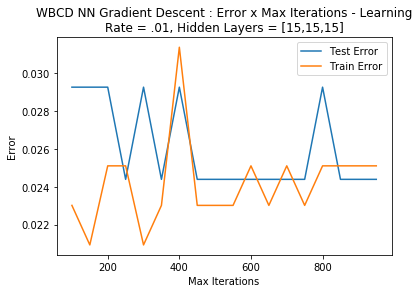

In [18]:

plt.figure()
title = "WBCD NN Gradient Descent : Error x Max Iterations - Learning Rate = .01, Hidden Layers = [15,15,15]"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iter_list, testError, '-', label='Test Error')
plt.plot(max_iter_list, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Error')
filename = 'WBCD_SGD_MaxIter_SMALLVar_Seed23.png'
plt.savefig("../plots/" + filename)


### Genetic Algs Code

In [22]:
np.random.seed(5)

hidden_node_architecture = [15, 15, 15]

# Lists to hold values for x and y axes 
max_iter_list = list()
testError = []
trainError = []

# Create list to hold data on each trial
data = []
# Columns for df we'll create after loop 
cols = ["Max Iterations", "training accuracy", "testing accuracy", "training MSE", "testing MSE"]

# COMMENCE TRAINING LOOP 
for max_iter in range(500, 10001, 500) :
    
    print("Training NN with max_iter: ", max_iter)
    
    nn_sigmoid = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'genetic_alg', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True, 
                                        pop_size=100,
                                        clip_max = 5, max_attempts = 100)

    nn_sigmoid.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred = nn_sigmoid.predict(X_train)
    y_test_pred = nn_sigmoid.predict(X_test)
    
    # MSE Values 
    train_err = mean_squared_error(y_train,
                        y_train_pred)
    test_err = mean_squared_error(y_test,
                        y_test_pred) 

    # Accuracy Values
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    data.append([max_iter, y_train_accuracy, y_test_accuracy, train_err, test_err])
    
    
    # Append data to lists
    testError.append(test_err)
    trainError.append(train_err)
    max_iter_list.append(max_iter)
    
    
# Store results from above into df 
result_df = pd.DataFrame(data, columns=cols)
print(result_df)
    


Training NN with max_iter:  500
Training NN with max_iter:  1000
Training NN with max_iter:  1500
Training NN with max_iter:  2000
Training NN with max_iter:  2500
Training NN with max_iter:  3000
Training NN with max_iter:  3500
Training NN with max_iter:  4000
Training NN with max_iter:  4500
Training NN with max_iter:  5000
Training NN with max_iter:  5500
Training NN with max_iter:  6000
Training NN with max_iter:  6500
Training NN with max_iter:  7000
Training NN with max_iter:  7500
Training NN with max_iter:  8000
Training NN with max_iter:  8500
Training NN with max_iter:  9000
Training NN with max_iter:  9500
Training NN with max_iter:  10000
    Max Iterations  training accuracy  testing accuracy  training MSE  \
0              500           0.968619          0.975610      0.031381   
1             1000           0.939331          0.936585      0.060669   
2             1500           0.947699          0.931707      0.052301   
3             2000           0.912134          0

### Plot it out (Genetic Alg) 

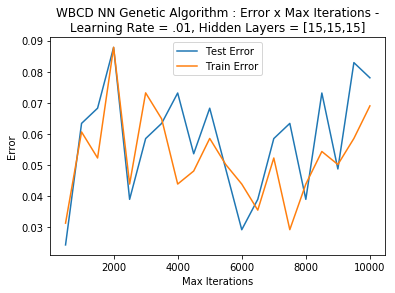

In [23]:

plt.figure()
title = "WBCD NN Genetic Algorithm : Error x Max Iterations - Learning Rate = .01, Hidden Layers = [15,15,15]"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iter_list, testError, '-', label='Test Error')
plt.plot(max_iter_list, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Error')
filename = 'WBCD_GA_MaxIter.png'
plt.savefig("../plots/" + filename)
